# Engineering Data Analysis

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Covariance and Correlation

In this notebook, we will explore how to compute covariance and correlation using Python. These statistical measures help to understand the relationship between two variables. We will use `numpy` for these calculations.

Let's get started!

# Dataset

Let's load the provided data set `NVDA.csv`. These are all the features:

| Feature  | Units | Description                            |
| :-       | :-    | :-                                     |
| Date     |       | Day of the year                        |
| Open     | \$    | Opening price of the stock that day    |
| High     | \$    | Highest price of the stock that day    |
| Low      | \$    | Lowest price of the stock that day     |
| Close    | \$    | Closing price of the stock that day    |
| Volume   |       | Total number of shared traded that day |

Run the cell below, which reads the data and saves it as a variable named `data`.

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('resources/NVDA.csv')

# Extract Close and Open Price and Volume
close = data['Close']
open = data['Open']
volume = data['Volume']

# Display the first few rows of the data using the head() method
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2000,0.098437,0.099219,0.091927,0.097526,300912000
1,1/4/2000,0.095833,0.096094,0.090104,0.094922,300480000
2,1/5/2000,0.092188,0.093750,0.090495,0.091797,188352000
3,1/6/2000,0.091797,0.091797,0.082292,0.085807,120480000
4,1/7/2000,0.085417,0.088151,0.084115,0.087240,71184000


Let's first visually examine if there is any relationship between the opening and closing daily stock price. 

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Create a scatter plot of the closing (y) versus opening (x) price. Label the axes.</div> 

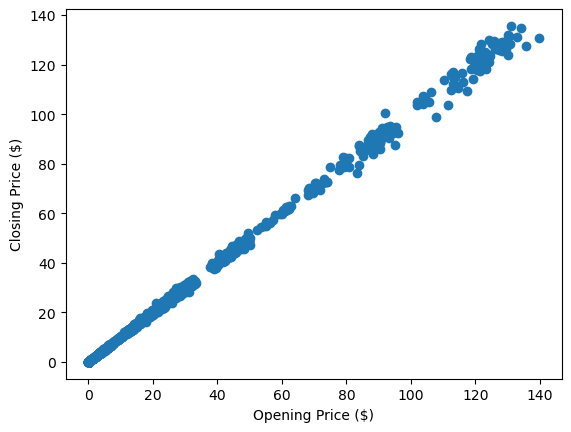

In [2]:
import matplotlib.pyplot as plt

# plot the scatter plot
plt.scatter(open, close)

# label the axes
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')

plt.show()

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> <b>What does the scatter plot tell you about the relationship between the closing and opening price?</b></div> 

# Covariance

Covariance is a measure of the joint variability of two random variables. It indicates the direction of the linear relationship between the variables. A positive covariance indicates that the variables tend to move in the same direction, while a negative covariance indicates that they tend to move in opposite directions.

In the lecture, we only discussed the covariance between two random variables: $Cov(X,Y)$. We can also compute something known as the covariance **matrix**. `Python` provides a direct way to compute the covariance **matrix** using `np.cov(X,Y)`, which returns:

\begin{bmatrix}
Var(X) & Cov(X,Y)\\
Cov(Y,X) & Var(Y)
\end{bmatrix}

The diagonal elements of the matrix contain the variances of the variables, and the off-diagonal elements contain the covariances between all possible pairs of variables. We mentioned in the lecture that $Cov(X,Y)=Cov(Y,X)$. So, the off-diagonal values will be equal.

The covariance matrix shows the covariance between each pair of variables, including that of the variable with itself.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the covariance matrix between the opening and closing daily stock price. Then, extract the covariance between the two variables.</div> 

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> <b>Interpret the value of the covariance.</b></div> 

In [3]:
import numpy as np

# compute covariance matrix
cov_matrix = np.cov(open, close)
print(f'Covariance matrix: \n {cov_matrix} \n')

Covariance matrix: 
 [[313.25901577 312.96041845]
 [312.96041845 312.9398681 ]] 



In [4]:
# get cov(X,Y)
cov = cov_matrix[0, 1]
print(f'Covariance: $^2 {cov:.2f}')

Covariance: $^2 312.96


<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the covariance matrix between the opening stock price and daily trading volume. Then, extract the covariance between the two variables.</div> 

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> <b>Interpret the value of the covariance.</b></div> 

In [5]:
# compute covariance matrix
cov_matrix = np.cov(open, volume)
print(f'Covariance matrix: \n {cov_matrix} \n')

Covariance matrix: 
 [[ 3.13259016e+02 -1.06507377e+09]
 [-1.06507377e+09  1.84744857e+17]] 



In [6]:
# get cov(X,Y)
cov = cov_matrix[0, 1]
print(f'Covariance: $ x shares {cov:.2f}')

Covariance: $ x shares -1065073774.34


# Correlation

Correlation is a standardized measure of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

`Python` also provides a direct way to compute the correlation **matrix** using `np.corrcoef(X,Y)`, which returns:

\begin{bmatrix}
1 & \rho_{XY}\\
\rho_{YX} & 1
\end{bmatrix}

The diagonal elements of the matrix contain the correlation of the variables with themselves (which is 1), and the off-diagonal elements contain the correlation coefficients between all possible pairs of variables.

The correlation matrix shows the correlation between each pair of variables, including that of the variable with itself.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the correlation matrix between the opening and closing daily stock price. Then, extract the correlation between the two variables.</div>

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> <b>Interpret the value of the correlation coefficient.</b></div> 

In [7]:
# compute correlation matrix
cor_matrix = np.corrcoef(open, close)
print(f'Correlation matrix: \n {cor_matrix} \n')

Correlation matrix: 
 [[1.         0.99955611]
 [0.99955611 1.        ]] 



In [8]:
# get cov(X,Y)
cor = cor_matrix[0, 1]
print(f'Correlation: {cor:.4f}')

Correlation: 0.9996


<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the correlation matrix between the opening stock price and daily trading volume. Then, extract the correlation between the two variables.</div> 

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> <b>Interpret the value of the correlation coefficient.</b></div> 

In [9]:
# compute correlation matrix
cor_matrix = np.corrcoef(open, volume)
print(f'Correlation matrix: \n {cor_matrix} \n')

Correlation matrix: 
 [[ 1.         -0.14000441]
 [-0.14000441  1.        ]] 



In [10]:
# get cov(X,Y)
cor = cor_matrix[0, 1]
print(f'Correlation: {cor:.4f}')

Correlation: -0.1400


<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Create a scatter plot of the trading volume (y) versus opening price (x). Label the axes.</div> 

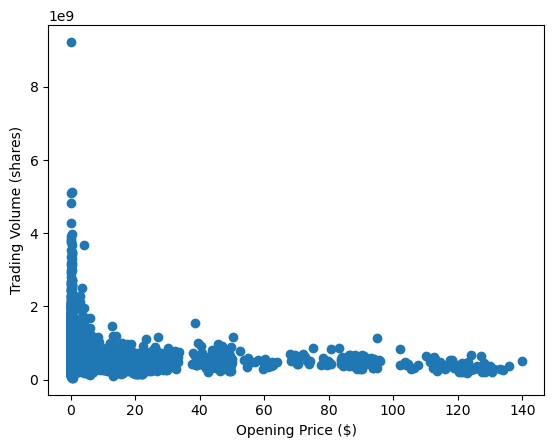

In [11]:
import matplotlib.pyplot as plt

# create the scatter plot
plt.scatter(open, volume)

# label the axes
plt.xlabel('Opening Price ($)')
plt.ylabel('Trading Volume (shares)')

plt.show()